# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [58]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

def open_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def show_all(images = [], vertical = False):
    def append_plot(ax, image):
        ax.imshow(image, 'gray')

    n = len(images)
    shorter_side = 10
    longer_side = 5 * len(images)

    if vertical:
        fig, axs = plt.subplots( n, 1 )
        fig.set_size_inches(shorter_side, longer_side)
    else:
        fig, axs = plt.subplots( 1, n )
        fig.set_size_inches(longer_side, shorter_side)


    if len(images) == 1:
        image = images[0]
        append_plot(axs, image)
    else:
        for i in range(len(images)):
            image = images[i]
            append_plot(axs[i], image)
    plt.show()

image_lena_noise = open_image("lenaRGBSzum.png")
image_lena = open_image("lenaRGB.png")


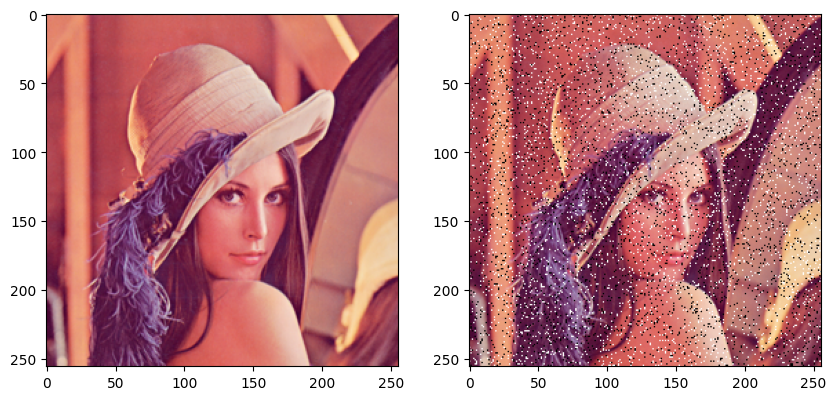

In [59]:
show_all([
    image_lena,
    image_lena_noise
])

In [60]:
def median_filter(image, window_size = 3):
    height, width, _ = image.shape

    padding = window_size // 2

    result = image.copy()

    for r in range(padding, height - padding):
        for c in range(padding, width - padding):
            window = image[
                r - padding: r + padding + 1, 
                c - padding: c + padding + 1, 
                :
            ]
            drgbs = np.zeros((window_size, window_size))
            for i in range(window_size):
                for j in range(window_size):
                    drgbs[i, j] = np.sqrt( np.sum(np.square(window - window[i, j])) )

            mi, mj = np.unravel_index(
                np.argmin(drgbs),
                (window_size, window_size)
            )

            result[r, c] = window[mi, mj, :]
    return result

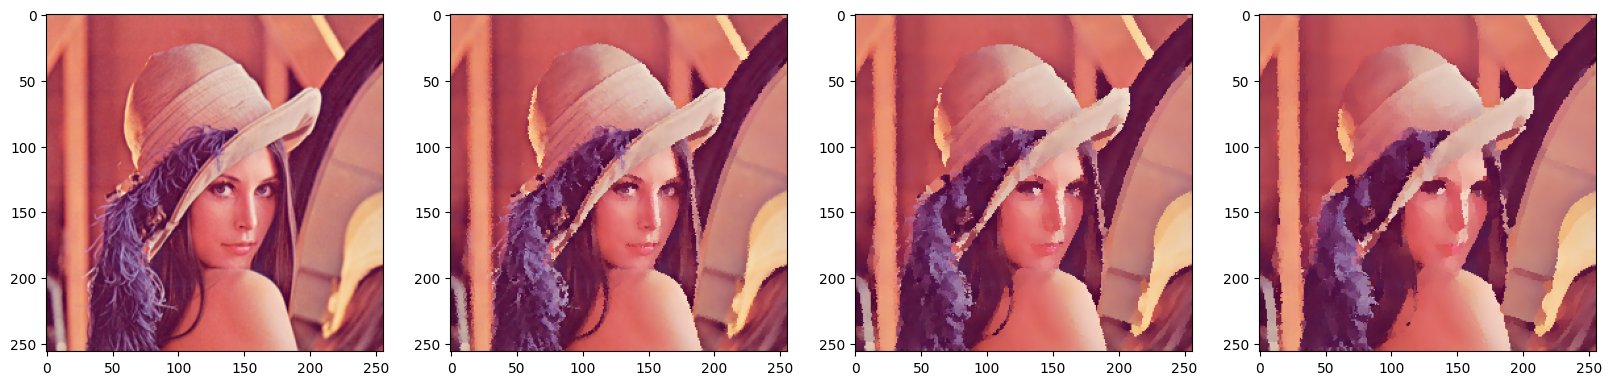

In [61]:
show_all([
    image_lena,
    median_filter(image_lena),
    median_filter(image_lena, 5),
    median_filter(image_lena, 7),
])

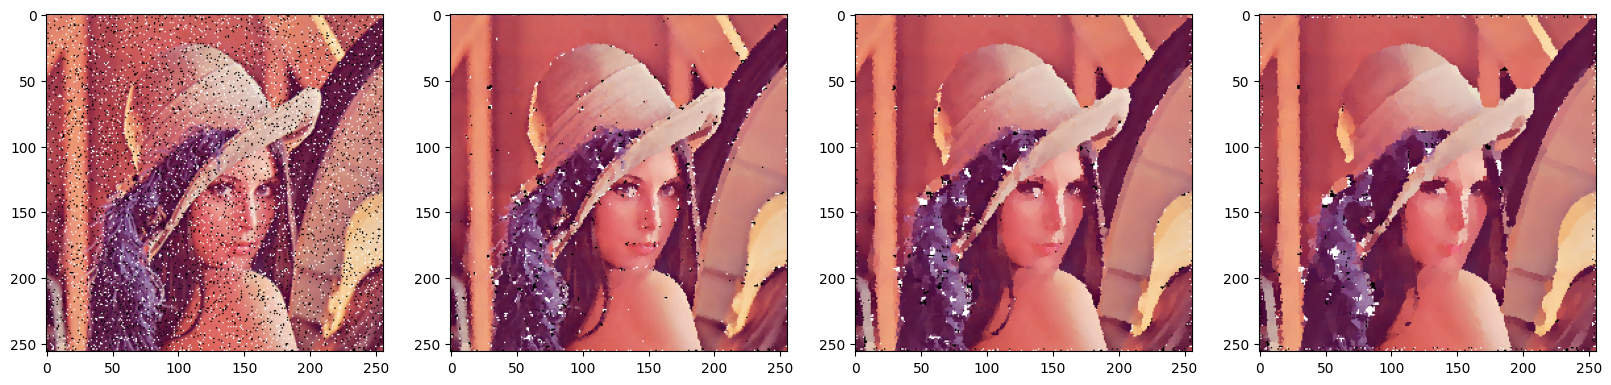

In [62]:
show_all([
    image_lena_noise,
    median_filter(image_lena_noise),
    median_filter(image_lena_noise, 5),
    median_filter(image_lena_noise, 7),
])